<a href="https://colab.research.google.com/github/Shashidhar99github/githubTest/blob/main/mProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import torchvision.transforms as transforms
from torchvision import datasets

In [ ]:
#Loading Pretrained data
train_dataset = datasets.MNIST(root='./data', train=True,transform=transforms.ToTensor(),download=True)

In [ ]:
#Loading Test data
test_dataset = datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

In [ ]:
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))

number of training samples: 60000
number of testing samples: 10000


In [ ]:
print("datatype of the 1st training sample: ", train_dataset[0][0].type())
print("size of the 1st training sample: ", train_dataset[0][0].size())

datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])


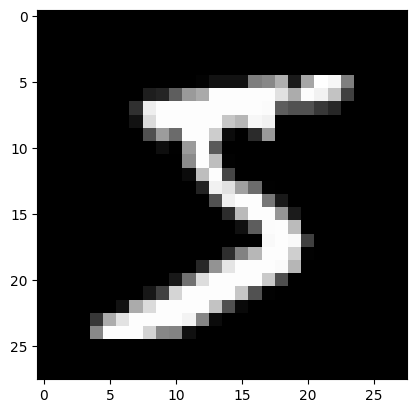

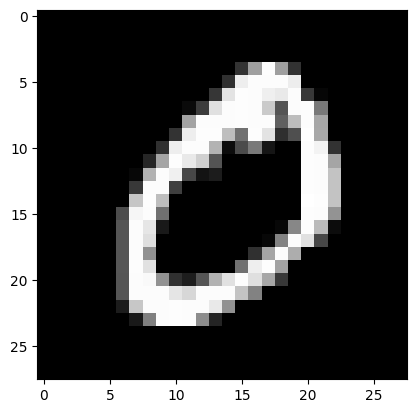

In [ ]:
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

In [ ]:
from torch.utils.data import DataLoader
# load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

In [ ]:
import torch
class LogisticRegression(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [ ]:
n_inputs = 28*28
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [ ]:
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 2.190995454788208. Accuracy: 61.13
Epoch: 1. Loss: 2.10139799118042. Accuracy: 74.59
Epoch: 2. Loss: 2.0579988956451416. Accuracy: 78.31
Epoch: 3. Loss: 2.0071663856506348. Accuracy: 80.27
Epoch: 4. Loss: 1.922825574874878. Accuracy: 81.18
Epoch: 5. Loss: 1.9490771293640137. Accuracy: 81.77
Epoch: 6. Loss: 1.9567089080810547. Accuracy: 82.23
Epoch: 7. Loss: 1.88089919090271. Accuracy: 82.6
Epoch: 8. Loss: 1.8639342784881592. Accuracy: 83.03
Epoch: 9. Loss: 1.8259518146514893. Accuracy: 83.38
Epoch: 10. Loss: 1.7732563018798828. Accuracy: 83.59
Epoch: 11. Loss: 1.8057798147201538. Accuracy: 83.76
Epoch: 12. Loss: 1.8315330743789673. Accuracy: 83.96
Epoch: 13. Loss: 1.7986851930618286. Accuracy: 84.13
Epoch: 14. Loss: 1.811126947402954. Accuracy: 84.3
Epoch: 15. Loss: 1.8259966373443604. Accuracy: 84.47
Epoch: 16. Loss: 1.8224633932113647. Accuracy: 84.63
Epoch: 17. Loss: 1.809311866760254. Accuracy: 84.7
Epoch: 18. Loss: 1.772369146347046. Accuracy: 84.75
Epoch: 19. Loss

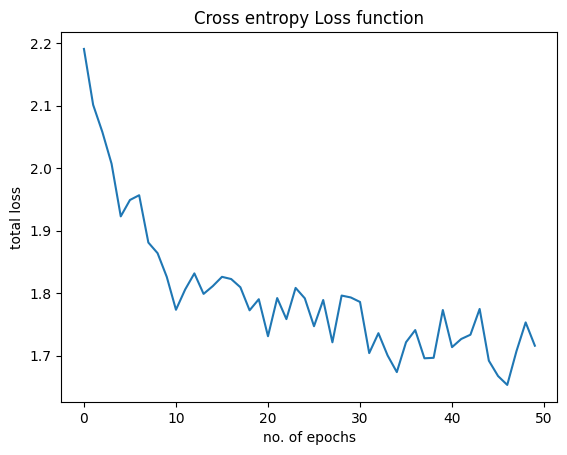

In [ ]:
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Cross entropy Loss function")
plt.show()

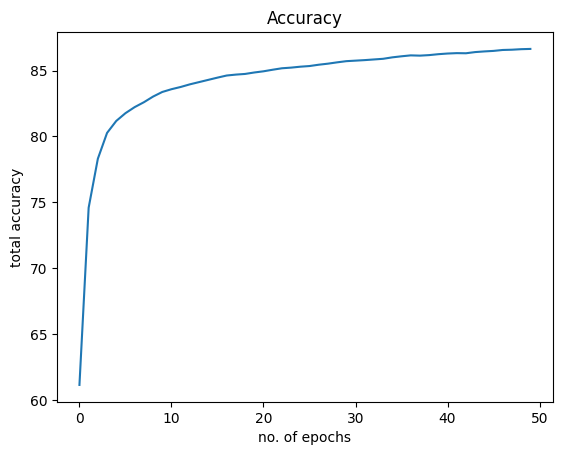

In [ ]:
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()

In [ ]:
print("label of the first testing sample: ", test_dataset[0][1])
print("label of the second testing sample: ", test_dataset[1][1])

label of the first testing sample:  7
label of the second testing sample:  2


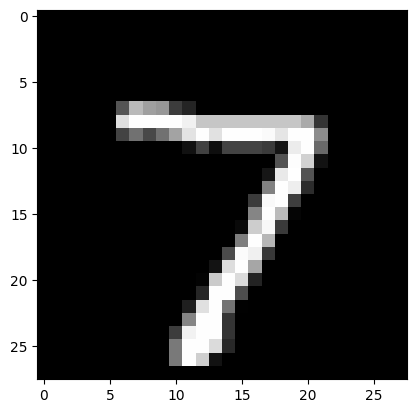

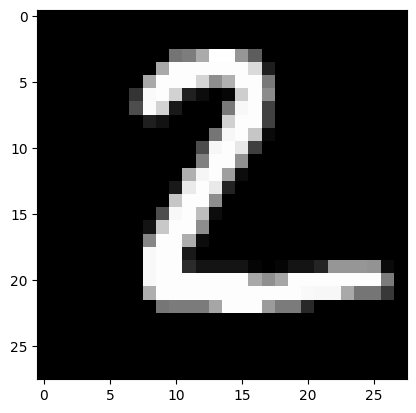

In [ ]:
img_7 = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_7, cmap='gray')
plt.show()
img_2 = test_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_2, cmap='gray')
plt.show()

Actual Label: 1, Predicted Label: 1


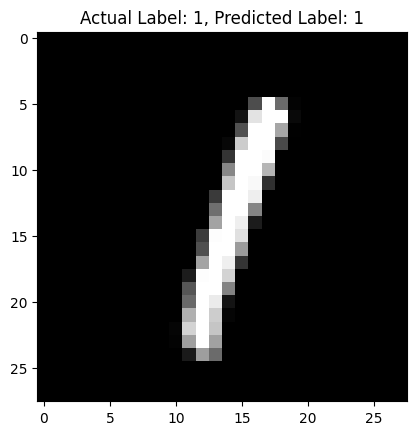

In [ ]:
#Prediction 1
sample_index =  5
sample_image, sample_label = test_dataset[sample_index]
output = log_regr(sample_image.view(-1, 28*28))
_, predicted_class = torch.max(output, 1)
print(f"Actual Label: {sample_label}, Predicted Label: {predicted_class.item()}")

sample_image = sample_image.numpy().reshape(28, 28)
plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual Label: {sample_label}, Predicted Label: {predicted_class.item()}")
plt.show()

Actual Label: 6, Predicted Label: 6


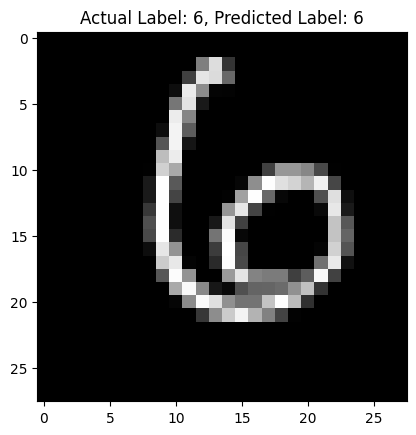

In [ ]:
#Prediction 2
sample_index =  100
sample_image, sample_label = test_dataset[sample_index]
output = log_regr(sample_image.view(-1, 28*28))
_, predicted_class = torch.max(output, 1)
print(f"Actual Label: {sample_label}, Predicted Label: {predicted_class.item()}")

sample_image = sample_image.numpy().reshape(28, 28)
plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual Label: {sample_label}, Predicted Label: {predicted_class.item()}")
plt.show()